# Focal Loss: Dengesiz Sınıflarda Kayıp Fonksiyonu

Bu Notebook, dengesiz sınıflarda daha etkili öğrenme sağlayan **Focal Loss** fonksiyonunu açıklar ve örnekler üzerinden nasıl kullanılacağını gösterir.




## 🔍 Focal Loss Nedir?

Focal Loss, özellikle **dengesiz sınıf dağılımlarına** sahip veri kümelerinde kullanılan bir kayıp (loss) fonksiyonudur. Standart Binary Cross Entropy ya da Categorical Cross Entropy fonksiyonlarının aksine, kolay sınıflandırılan örneklerin etkisini azaltır ve zor örneklere daha fazla odaklanır.

Bu yaklaşım ilk olarak **Lin et al. (2017)** tarafından, RetinaNet adlı nesne tanıma modeli için önerilmiştir.

Focal Loss formülü:


$$
FL(p_t) = -\alpha_t (1 - p_t)^\gamma \log(p_t)
$$

Burada:
- \( p_t \): Doğru sınıf için modelin tahmin olasılığı
- \( \alpha_t \): Azınlık sınıfına ağırlık verilmesini sağlayan dengeleme parametresi (0 < α < 1)
- \( \gamma \): Odaklanma parametresi. Bu parametre arttıkça kolay örneklerin katkısı azalır, zor örneklere daha fazla önem verilir.
- \( (1 - p_t)^\gamma \): Odaklanma faktörü. Doğru tahminlerde bu ifade sıfıra yaklaşır, bu da doğru tahminlerin kaybını azaltır.

## 📌 Kullanım Alanları

- Nesne tespiti (özellikle az sayıda örneğe sahip nesneler)
- Tıbbi görüntü sınıflandırma gibi yüksek dengesizlik içeren veri setleri
- Nadir olay tahminleri (ör. fraud detection)


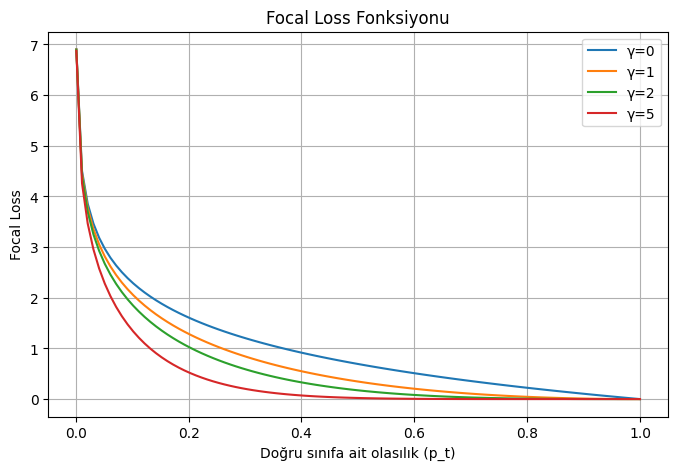

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def focal_loss(p_t, gamma=2.0, alpha=1.0):
    """
    Focal Loss hesaplama fonksiyonu
    p_t: doğru sınıfa ait olasılık (0 < p_t <= 1)
    gamma: odaklanma parametresi
    alpha: sınıf dengesi için ağırlıklandırma
    """
    return -alpha * (1 - p_t) ** gamma * np.log(p_t + 1e-9)  # epsilon eklenerek log(0) önlenir

# Farklı gamma değerleri için görselleştirme
p = np.linspace(0.001, 1.0, 100)
plt.figure(figsize=(8, 5))
for g in [0, 1, 2, 5]:
    loss = focal_loss(p, gamma=g)
    plt.plot(p, loss, label=f'γ={g}')

plt.title('Focal Loss Fonksiyonu')
plt.xlabel('Doğru sınıfa ait olasılık (p_t)')
plt.ylabel('Focal Loss')
plt.legend()
plt.grid(True)
plt.show()


## 🔍 Focal Loss vs Cross Entropy

- **Cross Entropy**, tüm örnekleri eşit önemde kabul eder.
- **Focal Loss**, kolay sınıflandırılan örneklerin katkısını baskılar ve öğrenmenin zor örneklere odaklanmasını sağlar.

Bu nedenle, özellikle **dengesiz sınıflarda** Focal Loss önemli bir avantaj sağlar.


## ✅ Sonuç

Focal Loss, dengesiz sınıflı veri kümelerinde daha iyi genel performans elde etmeye yardımcı olur. `gamma` parametresi ayarlanarak modelin zor örneklere olan duyarlılığı artırılabilir.
